I have trained two convolutional neural networks (CNNs) to classify X, Y, Z images. The first model consists of 2 convolutional/maxpooling layers, followed by 2 fully connected layers. The second smaller model is a smaller version of the first model, with only 1 convolutional/maxpooling layer and 1 fully connected layer. Bigger dataset performs slightly better on the test set.

In [8]:
import torch
import torch.nn as nn
from src.utils import plot_images, analyze_predictions
from src.preprocess import preprocess
from src.train import trainNN, evaluate_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
# Load models
model = torch.load('models/model.pth', weights_only=False)
model_mini = torch.load('models/model_mini.pth', weights_only=False)

# load test data to dataloader
data_test = pd.read_csv('data/test.csv')
test_loader = preprocess(data_test, batch_size=10000)

              precision    recall  f1-score   support

           X      0.976     0.992     0.984       122
           Y      0.999     0.998     0.999      1087
           Z      0.997     0.995     0.996       609

    accuracy                          0.997      1818
   macro avg      0.991     0.995     0.993      1818
weighted avg      0.997     0.997     0.997      1818



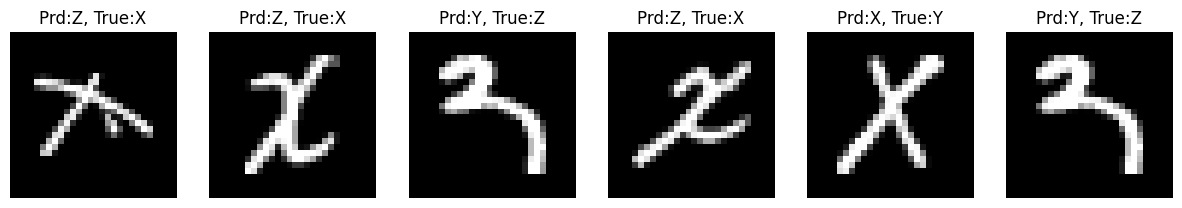

In [ ]:
# larger model wrong predictions and metrics
analyze_predictions(model, test_loader, device)

              precision    recall  f1-score   support

           X      0.976     0.984     0.980       123
           Y      0.998     0.997     0.998      1087
           Z      0.997     0.997     0.997       608

    accuracy                          0.996      1818
   macro avg      0.990     0.993     0.991      1818
weighted avg      0.996     0.996     0.996      1818



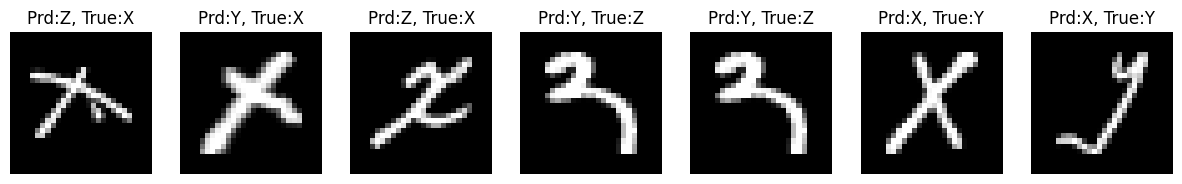

In [13]:
# smaller model wrong predictions
analyze_predictions(model_mini, test_loader, device)

The smaller model has almost the same accuracy as the bigger model. They perform worst on minority class 'X'. One of the misclassified images is wrongly labeled.